## A learning of roc curve for binary classification
See my [blog](http://www.mazhixian.me/2018/03/11/understanding-of-auc-curve/) for detail

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
# Init
labels = np.array([1,1,0,1,0,0,0,1,0,1,0]).astype(int)
p = np.array([0.5, 0.6, 0.2, 0.9, 0.5, 0.3, 0.1, 0.7, 0.3, 0.9, 0.5])                 

In [4]:
# Calc tpr and fpr
def calcmeasures(labels, p, thrs):
    labels_est = np.zeros(labels.shape, dtype=int)
    labels_est[p >= thrs] = 1
    # calc TP
    idx1 = np.where(labels == 1)[0]
    idx2 = np.where(labels_est == 1)[0]
    s_TP = len(np.intersect1d(idx1, idx2))
    # TN
    idx1 = np.where(labels == 0)[0]
    idx2 = np.where(labels_est == 0)[0]
    s_TN = len(np.intersect1d(idx1, idx2))
    # FP
    idx1 = np.where(labels == 0)[0]
    idx2 = np.where(labels_est == 1)[0]
    s_FP = len(np.intersect1d(idx1, idx2))
    # FN
    idx1 = np.where(labels == 1)[0]
    idx2 = np.where(labels_est == 0)[0]
    s_FN = len(np.intersect1d(idx1, idx2))
    # tpr and fpr
    tpr = s_TP / (s_TP + s_FN)
    fpr = s_FP / (s_TN + s_FP)
    
    return tpr,fpr

In [5]:
thrs = np.arange(1., 0.0-0.1, -0.1)
# thrs = np.array([0.1, 0.3, 0.5, 0.6, 0.9])
tpr = np.zeros(thrs.shape)
fpr = np.zeros(thrs.shape)
for i,t in enumerate(thrs):
    tpr[i],fpr[i] = calcmeasures(labels, p, t)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

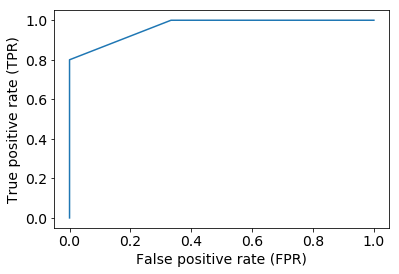

In [6]:
# Display results
# plt.rcParams["figure.figsize"] = [7.2, 5.0]

plt.plot(fpr,tpr)

plt.xlabel("False positive rate (FPR)", fontsize=14)
plt.ylabel("True positive rate (TPR)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.savefig("fig_roc.png", bbox_inches='tight', dpi=200)

In [7]:
print(tpr)

[0.  0.4 0.4 0.4 0.6 0.8 1.  1.  1.  1.  1. ]


In [8]:
print(fpr)

[0.         0.         0.         0.         0.         0.
 0.33333333 0.33333333 0.66666667 0.83333333 1.        ]


In [9]:
## Calc auc
def calcauc(fpr,tpr):
    auc = (fpr[1:] - fpr[0:-1])*(tpr[0:-1]+tpr[1:])/2
    return auc.sum()

In [10]:
auc = calcauc(fpr,tpr)
print("AUC = {0}".format(auc))

AUC = 0.9666666666666667


###  By sklearn.metrics.auc

In [11]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(labels+1, p, pos_label=2)
metrics.auc(fpr, tpr)

0.9666666666666667